In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

! pip install opencv-python

! pip install opencv

#import cv2

##Import any other packages you may need here

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

Image Index  Finding Labels  Follow-up #  Patient ID Patient Age  \
3930  00019388_001.png      No Finding            1       19388        049Y   
1106  00005759_007.png  Edema|Effusion            7        5759        063Y   
3366  00016601_001.png    Infiltration            1       16601        006Y   

     Patient Gender View Position  OriginalImageWidth  OriginalImageHeight  \
3930              M            PA                2500                 2048   
1106              F            AP                2500                 2048   
3366              M            PA                2326                 2277   

      OriginalImagePixelSpacing_x  OriginalImagePixelSpacing_y  
3930                        0.168                        0.168  
1106                        0.168                        0.168  
3366                        0.143                        0.143

In [3]:
## EDA
# Todo 

import pandas as pd
df = pd.read_csv("Data_For_Exploration.csv")
pd.set_option("display.max.columns", None)
df.head(50)

Unnamed: 0       Image Index  \
0            0  00000001_000.png   
1            1  00000001_001.png   
2            2  00000001_002.png   
3            3  00000002_000.png   
4            4  00000003_000.png   
5            5  00000003_001.png   
6            6  00000003_002.png   
7            7  00000003_003.png   
8            8  00000003_004.png   
9            9  00000003_005.png   
10          10  00000003_006.png   
11          11  00000003_007.png   
12          12  00000004_000.png   
13          13  00000005_000.png   
14          14  00000005_001.png   
15          15  00000005_002.png   
16          16  00000005_003.png   
17          17  00000005_004.png   
18          18  00000005_005.png   
19          19  00000005_006.png   
20          20  00000005_007.png   
21          21  00000006_000.png   
22          22  00000007_000.png   
23          23  00000008_000.png   
24          24  00000008_001.png   
25          25  00000008_002.png   
26          26  00000009_000.png   
27          27  00000010_000.png   
28          28  00000011_000.png   
29          29  00000011_001.png   
30          30  00000011_002.png   
31          31  00000011_003.png   
32          32  00000011_004.png   
33          33  00000011_005.png   
34          34  00000011_006.png   
35          35  00000011_007.png   
36          36  00000011_008.png   
37          37  00000012_000.png   
38          38  00000013_000.png   
39          39  00000013_001.png   
40          40  00000013_002.png   
41          41  00000013_003.png   
42          42  00000013_004.png   
43          43  00000013_005.png   
44          44  00000013_006.png   
45          45  00000013_007.png   
46          46  00000013_008.png   
47          47  00000013_009.png   
48          48  00000013_010.png   
49          49  00000013_011.png   

                                       Finding Labels  Follow-up #  \
0                                        Cardiomegaly            0   
1                              Cardiomegaly|Emphysema            1   
2                               Cardiomegaly|Effusion            2   
3                                          No Finding            0   
4                                              Hernia            0   
5                                              Hernia            1   
6                                              Hernia            2   
7                                 Hernia|Infiltration            3   
8                                              Hernia            4   
9                                              Hernia            5   
10                                             Hernia            6   
11                                             Hernia            7   
12                                        Mass|Nodule            0   
13                                         No Finding            0   
14                                         No Finding            1   
15                                         No Finding            2   
16                                         No Finding            3   
17                                         No Finding            4   
18                                         No Finding            5   
19                                       Infiltration            6   
20                              Effusion|Infiltration            7   
21                                         No Finding            0   
22                                         No Finding            0   
23                                       Cardiomegaly            0   
24                                         No Finding            1   
25                                             Nodule            2   
26                                          Emphysema            0   
27                                       Infiltration            0   
28                                           Effusion            0   
29                                         No Finding            1 

Distribution of Primary Diseases in IMAGES


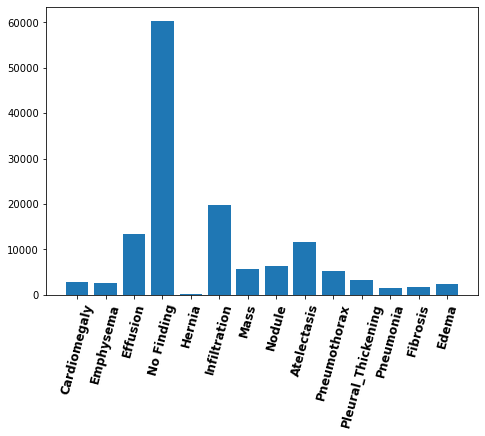

In [4]:
%matplotlib inline

print("Distribution of Primary Diseases in IMAGES")

findings_list = []
findings_list.append("Cardiomegaly")
findings_list.append("Emphysema")
findings_list.append("Effusion")
findings_list.append("No Finding")
findings_list.append("Hernia")
findings_list.append("Infiltration")
findings_list.append("Mass")
findings_list.append("Nodule")
findings_list.append("Atelectasis")
findings_list.append("Pneumothorax")
findings_list.append("Pleural_Thickening")
findings_list.append("Pneumonia")
findings_list.append("Fibrosis")
findings_list.append("Edema")

value_list = []

for idx in findings_list:
    temp = df[idx].value_counts()
    value_list.append(temp[1])
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#langs = ['C', 'C++', 'Java', 'Python', 'PHP']
#students = [23,17,35,29,12]
ax.bar(findings_list ,value_list)

plt.xticks(rotation=75, fontweight='bold', fontsize='12')

plt.show()

DISTRUBUTION of Pneumonia Positive XRAYS in dataset
Pneumonia
0    110689
1      1431
Name: Pneumonia, dtype: int64
Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays but only a fraction of them are Pneumonia positive.


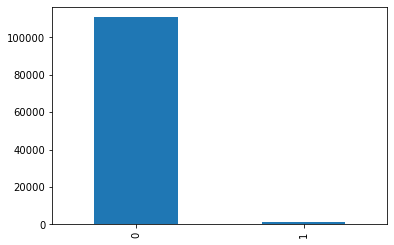

In [5]:
%matplotlib inline

print("DISTRUBUTION of Pneumonia Positive XRAYS in dataset")

print('Pneumonia')
print(df['Pneumonia'].value_counts())

df['Pneumonia'].value_counts().plot(kind='bar')

#*Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays be only a fraction of them are Pneumonia positive."

my_text = "Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays but only a fraction of them are Pneumonia positive."

print(my_text)

DISTRIBUTION of Lung Infiltration in data set
Infiltration
0    92226
1    19894
Name: Infiltration, dtype: int64


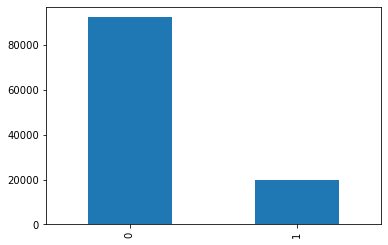

In [6]:
%matplotlib inline

print("DISTRIBUTION of Lung Infiltration in data set")
print('Infiltration')
print(df['Infiltration'].value_counts())
df['Infiltration'].value_counts().plot(kind='bar')

DISTRIBUTION of Emphysema in data set
Emphysema
0    109604
1      2516
Name: Emphysema, dtype: int64


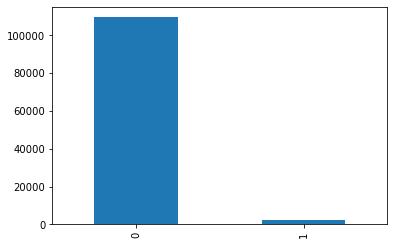

In [7]:
%matplotlib inline

print("DISTRIBUTION of Emphysema in data set")
print('Emphysema')
print(df['Emphysema'].value_counts())
df['Emphysema'].value_counts().plot(kind='bar')

DISTRIBUTION of Pneumothorax in data set


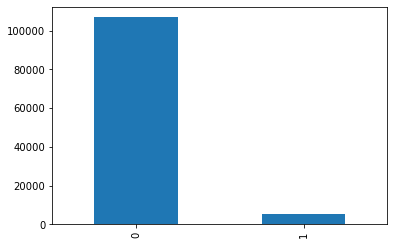

In [8]:
%matplotlib inline

print("DISTRIBUTION of Pneumothorax in data set")

df['Pneumothorax'].value_counts().plot(kind='bar')

DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people under 40
Pneumonia
0    37372
1      583
Name: Pneumonia, dtype: int64
Infiltration
0    30853
1     7102
Name: Infiltration, dtype: int64


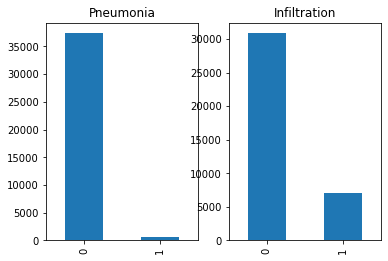

In [9]:
print("DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people under 40")

df_under_40 = df[(df['Patient Age'] >= 1) & (df['Patient Age'] <= 40)]

df_copy = df_under_40

df.head(20)

categorical_features = ["Pneumonia", "Infiltration"]
#categorical_features = ["Cardiomegaly","Emphysema","Effusion","No Finding","Hernia","Infiltration","Mass","Nodule","Atelectasis","Pneumothorax","Pleural_Thickening","Pneumonia","Fibrosis","Edema"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_under_40[categorical_features]):
    print(categorical_feature)
    print(df_copy[categorical_feature].value_counts())
    df_under_40[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()


DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40
Pneumonia
0    73317
1      848
Name: Pneumonia, dtype: int64
Infiltration
0    61373
1    12792
Name: Infiltration, dtype: int64


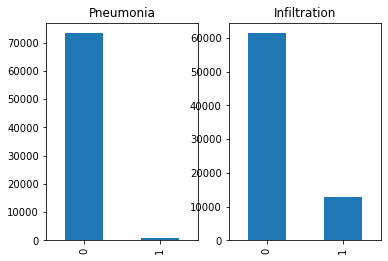

In [10]:
print("DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40")

df_over_40 = df[(df['Patient Age'] > 40)]

df_copy = df_over_40

df_over_40.head(20)

categorical_features = ["Pneumonia", "Infiltration"]
#categorical_features = ["Cardiomegaly","Emphysema","Effusion","No Finding","Hernia","Infiltration","Mass","Nodule","Atelectasis","Pneumothorax","Pleural_Thickening","Pneumonia","Fibrosis","Edema"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_over_40[categorical_features]):
    print(categorical_feature)
    print(df_copy[categorical_feature].value_counts())
    df_over_40[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40
Pneumonia
0    110689
1      1431
Name: Pneumonia, dtype: int64
Emphysema
0    109604
1      2516
Name: Emphysema, dtype: int64


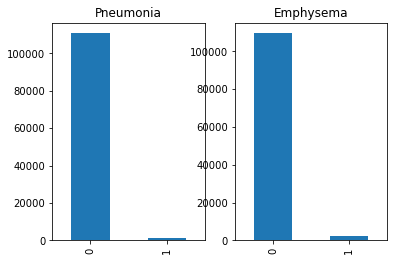

In [11]:
print("DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40")

#df_over_40 = df[(df['Patient Age'] > 40)]

#df_over_40.head(20)

df_copy = df

categorical_features = ["Pneumonia", "Emphysema"]
#categorical_features = ["Cardiomegaly","Emphysema","Effusion","No Finding","Hernia","Infiltration","Mass","Nodule","Atelectasis","Pneumothorax","Pleural_Thickening","Pneumonia","Fibrosis","Edema"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_copy[categorical_features]):
    print(categorical_feature)
    print(df_copy[categorical_feature].value_counts())
    df_copy[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

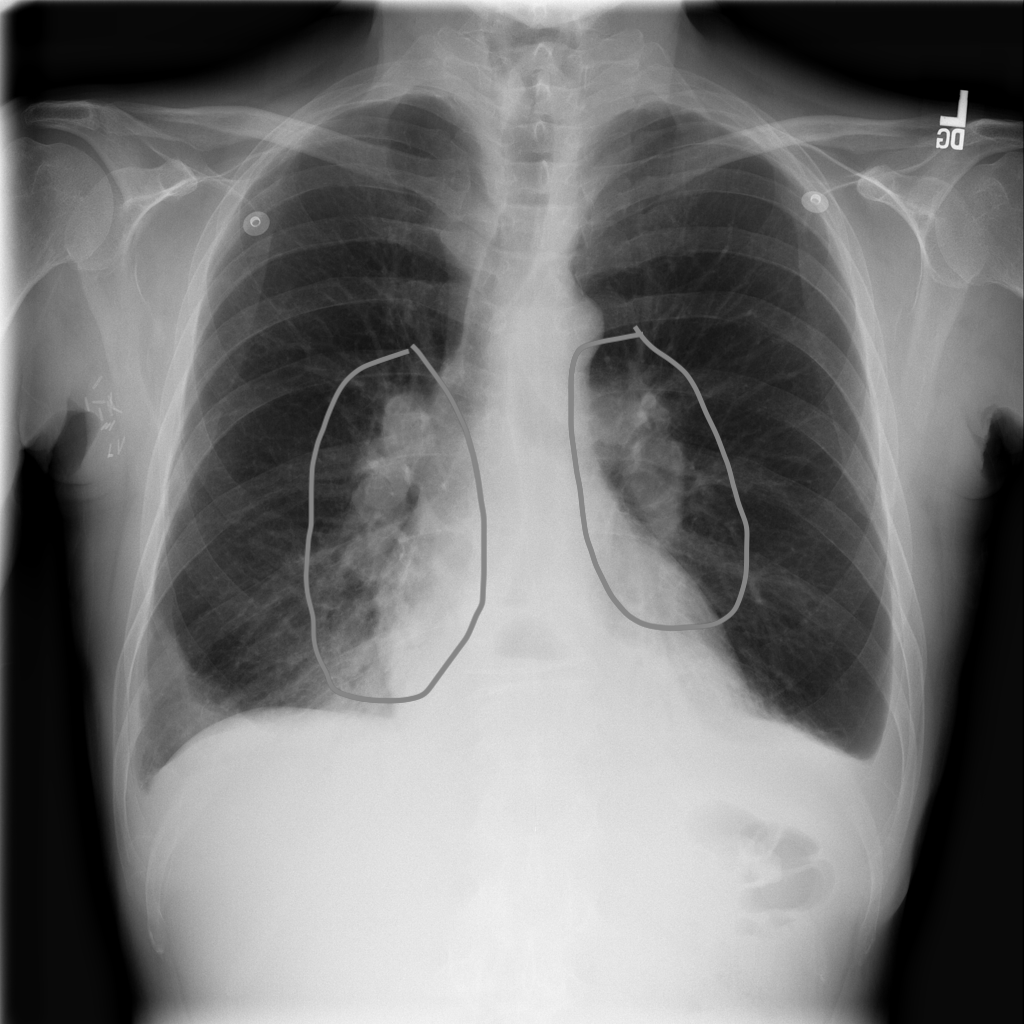

This XRAY was marked Pneumonia positive by the dataset. The XRAY Does obviously have lung infiltration!


In [12]:
from IPython.display import Image
display(Image(filename='MARKEDpositive_00009507_002.png'))

print("This XRAY was marked Pneumonia positive by the dataset. The XRAY Does obviously have lung infiltration!")

(array([362.,  68.,  38.,  75.,  21.,  32.,  28.,  38., 162., 200.]),
 array([0.29411766, 0.3592157 , 0.42431372, 0.48941177, 0.5545098 ,
        0.61960787, 0.6847059 , 0.7498039 , 0.81490195, 0.88      ,
        0.94509804], dtype=float32),
 <a list of 10 Patch objects>)

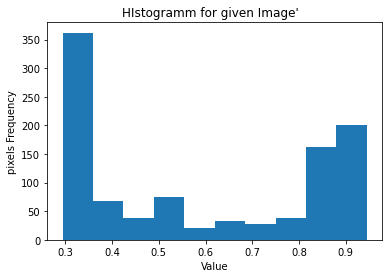

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('MARKEDpositive_00009507_002.png')
#image sclicing into 2D.
x=img[:,0]
#x = img
# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)


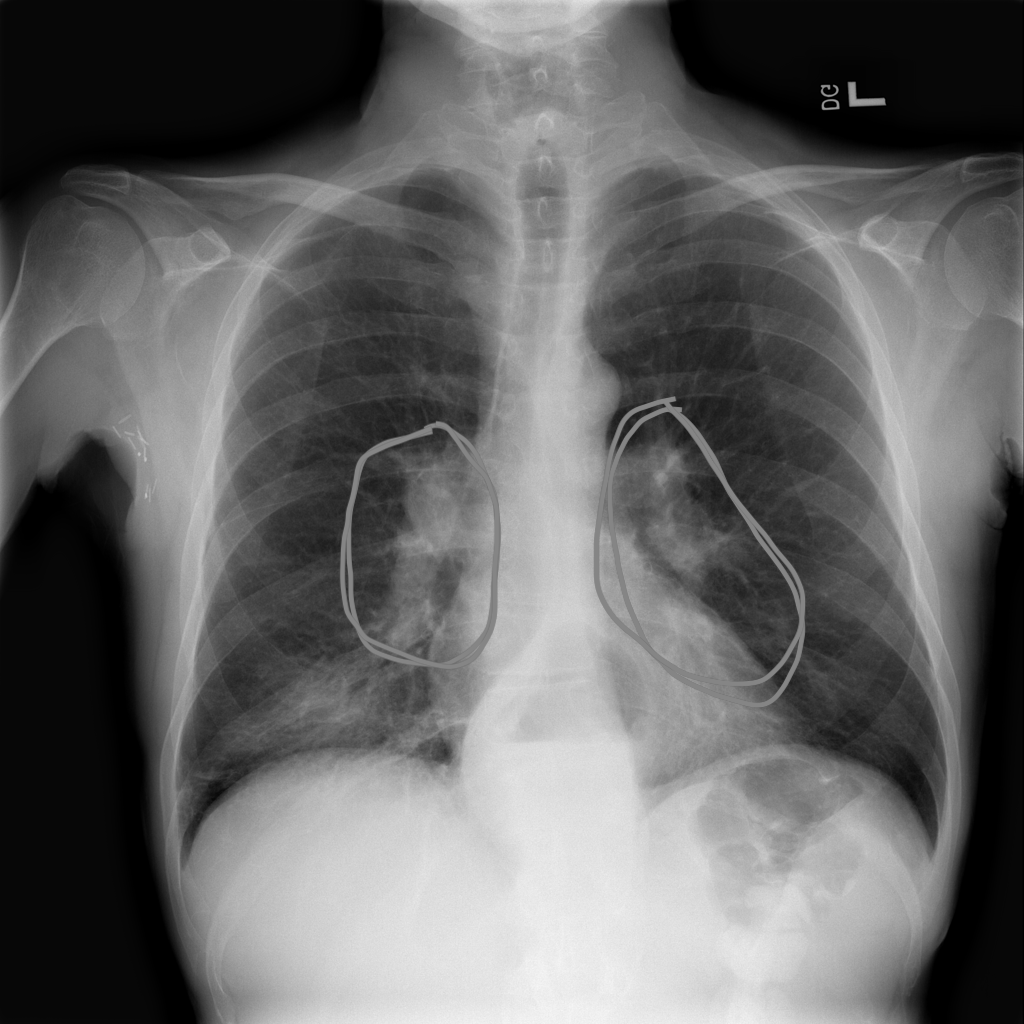

This XRAY was marked positive by the dataset. The XRAY Does obviously have lung infiltration!


In [14]:
display(Image(filename='MARKEDpositive_00009507_004.png'))

print("This XRAY was marked positive by the dataset. The XRAY Does obviously have lung infiltration!")

(array([640.,  34.,  22.,  20.,  23.,  41.,  51.,  99.,  64.,  30.]),
 array([0.01568628, 0.08392157, 0.15215686, 0.22039217, 0.28862745,
        0.35686275, 0.42509806, 0.49333334, 0.5615686 , 0.62980396,
        0.69803923], dtype=float32),
 <a list of 10 Patch objects>)

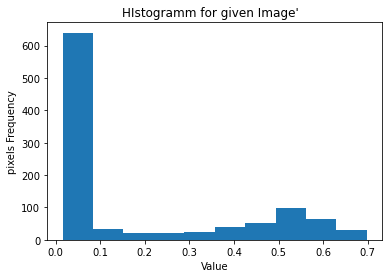

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('MARKEDpositive_00009507_004.png')
#image sclicing into 2D.
#x=img[:,:,0]
x=img[:,0]
#x = img
# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

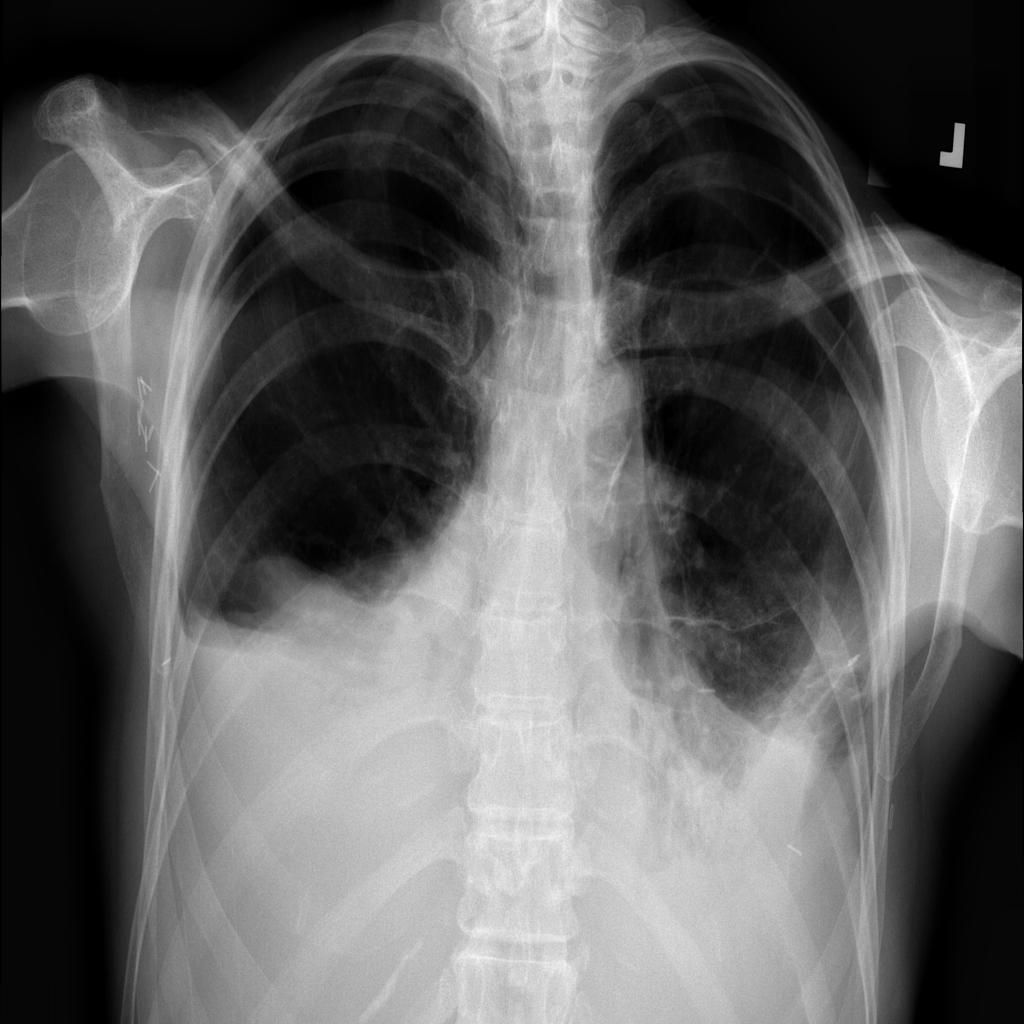

This XRAY is marked negative via the dataset. It does appear to have NO serious lung infiltration that I can see with my naked eye


In [16]:
display(Image(filename='CLEAR_negative_00000099_010.png'))

print("This XRAY is marked negative via the dataset. It does appear to have NO serious lung infiltration that I can see with my naked eye")

(array([983.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,  38.,   1.]),
 array([0.        , 0.00196078, 0.00392157, 0.00588235, 0.00784314,
        0.00980392, 0.01176471, 0.01372549, 0.01568628, 0.01764706,
        0.01960784], dtype=float32),
 <a list of 10 Patch objects>)

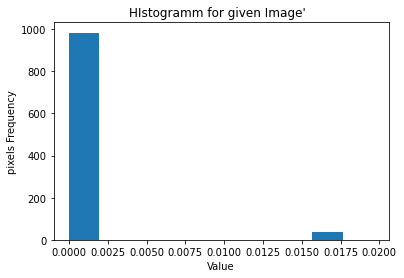

In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('CLEAR_negative_00000099_010.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]
# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

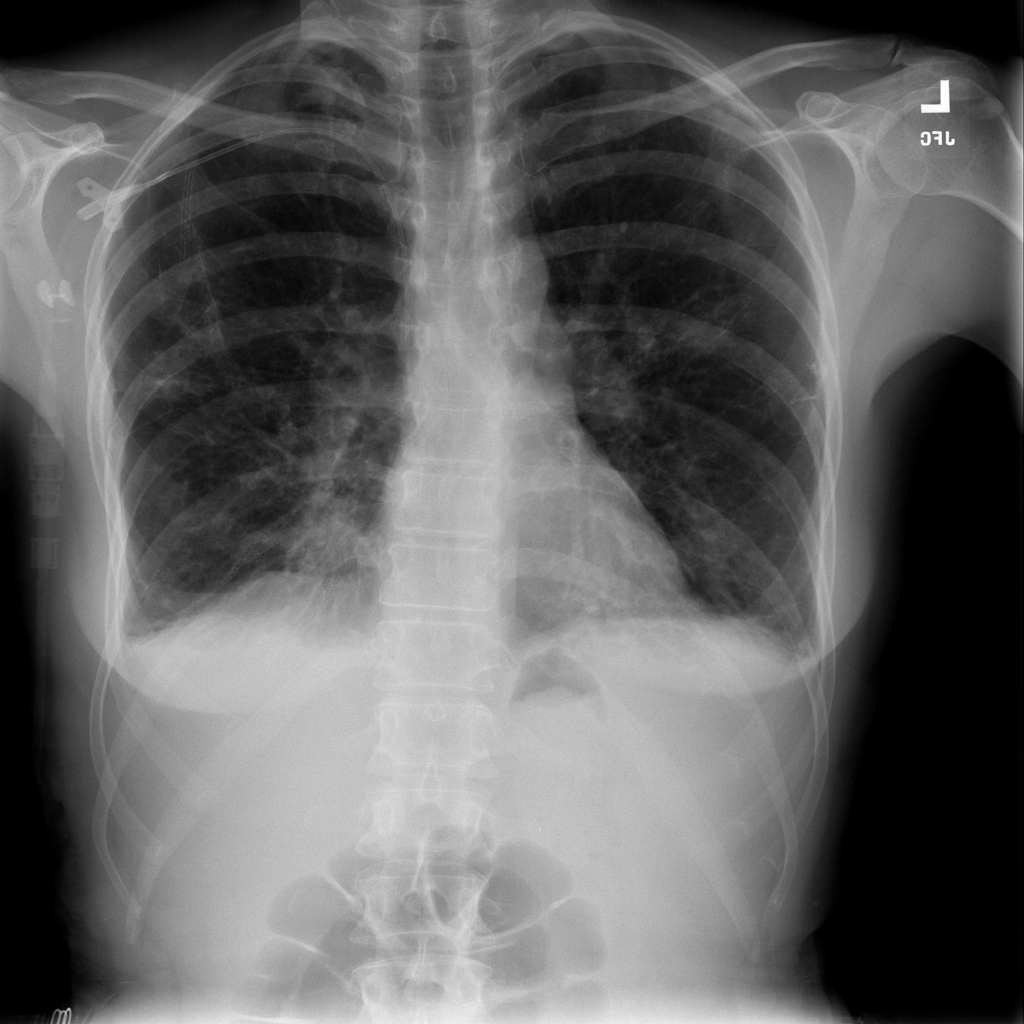

This XRAY is marked negative via the dataset. It does appear to have NO serious lung infiltration that I can see with my naked eye


In [18]:
display(Image(filename='CLEARnegative_00001974_014.png'))

print("This XRAY is marked negative via the dataset. It does appear to have NO serious lung infiltration that I can see with my naked eye")

(array([635.,  25.,  27.,  25.,  11.,  14.,   9.,  34., 144., 100.]),
 array([0.        , 0.06862745, 0.13725491, 0.20588236, 0.27450982,
        0.34313726, 0.4117647 , 0.48039216, 0.54901963, 0.61764705,
        0.6862745 ], dtype=float32),
 <a list of 10 Patch objects>)

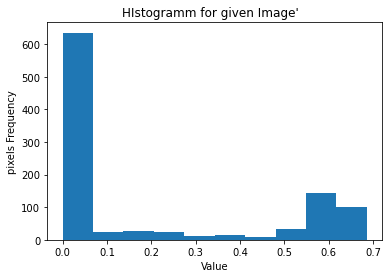

In [19]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('CLEARnegative_00001974_014.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]
# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

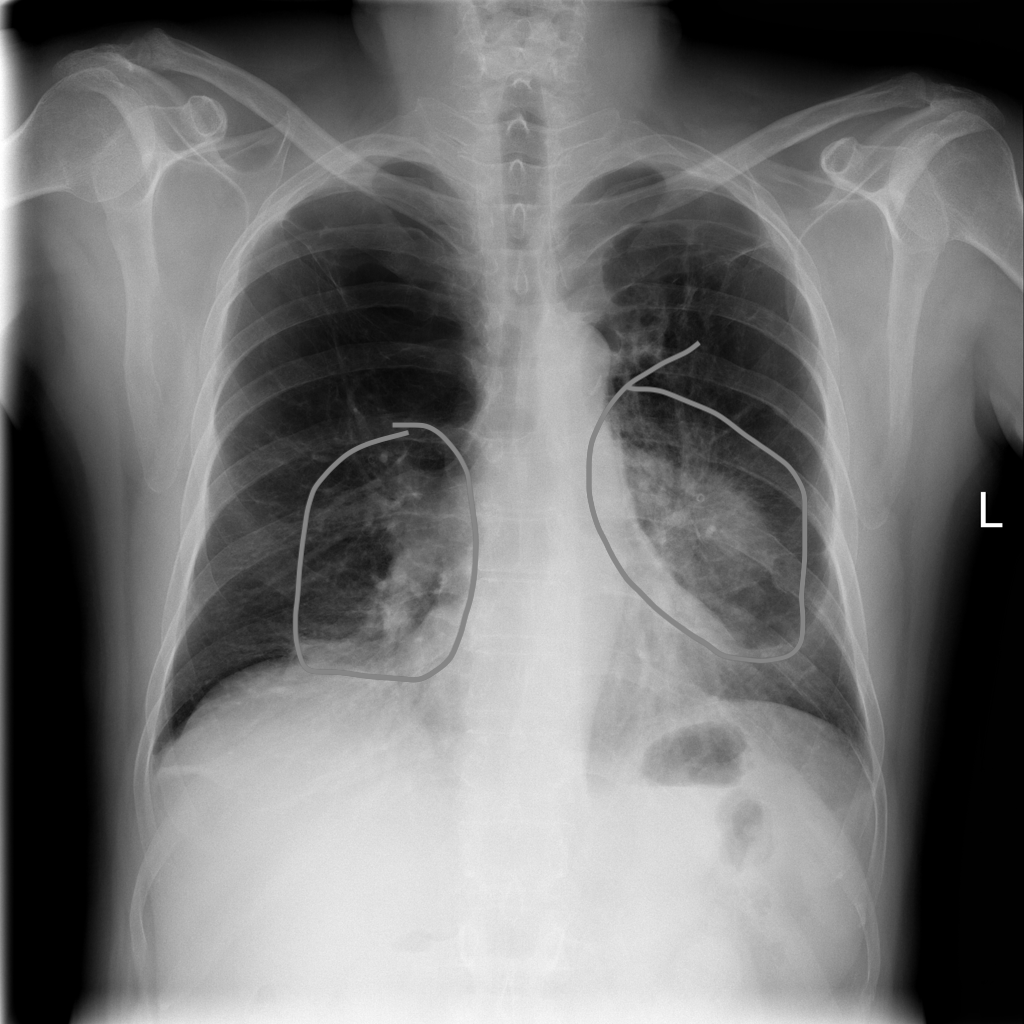

This XRAY was marked positive by the dataset. The XRAY Does obviously have lung infiltration!


In [20]:
display(Image(filename='MARKEDnegative_00000103_010.png'))

print("This XRAY was marked positive by the dataset. The XRAY Does obviously have lung infiltration!")

(array([322., 229.,  61.,  25.,  25.,  26.,  30.,  20.,  24., 262.]),
 array([0.43137255, 0.4882353 , 0.54509807, 0.6019608 , 0.65882355,
        0.71568626, 0.77254903, 0.82941175, 0.8862745 , 0.9431372 ,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

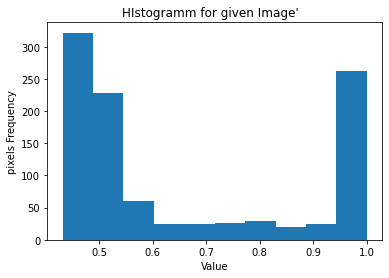

In [21]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('MARKEDnegative_00000103_010.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]
# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

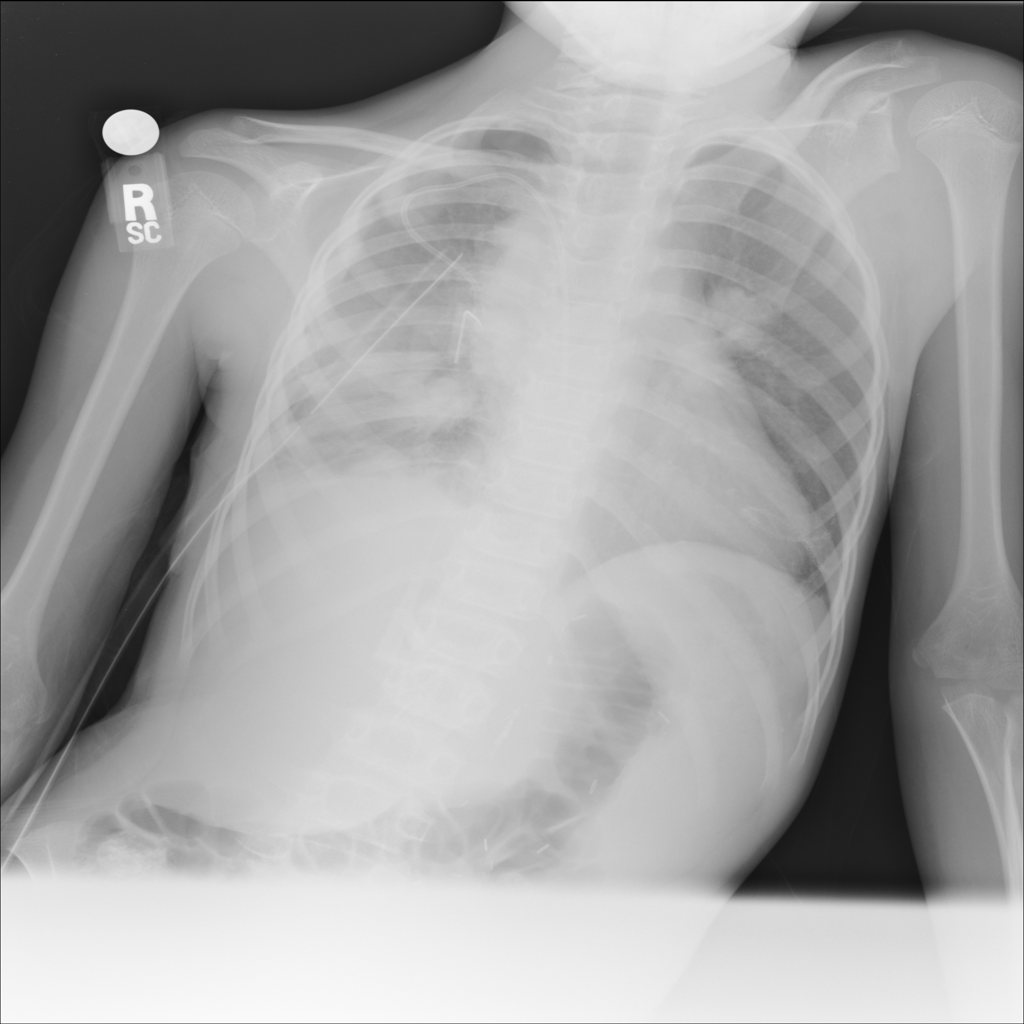

This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.


In [22]:
display(Image(filename='FALSE_NEGATIVES00007830_005.png'))

print("This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.")

(array([  1., 405.,  81.,  60.,  46., 184.,  91.,   3.,  22., 131.]),
 array([0.        , 0.05019608, 0.10039216, 0.15058824, 0.20078433,
        0.2509804 , 0.3011765 , 0.35137257, 0.40156865, 0.45176473,
        0.5019608 ], dtype=float32),
 <a list of 10 Patch objects>)

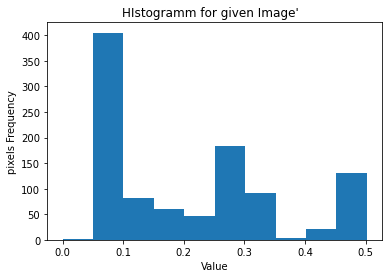

In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('FALSE_NEGATIVES00007830_005.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]
# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

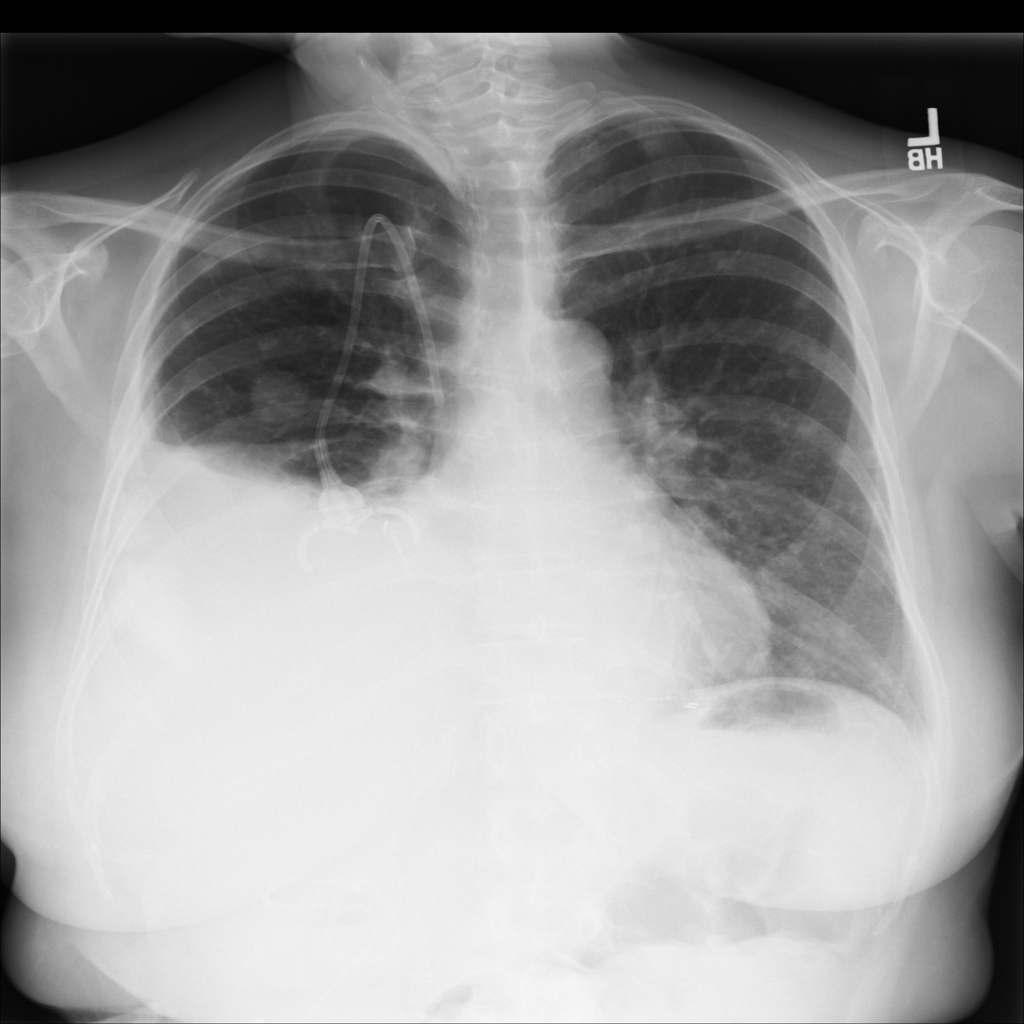

This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.


In [24]:
display(Image(filename='FALSE_NEGATIVES00007848_004.png'))

print("This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.")

(array([193., 141.,  21.,  12.,  12.,   5.,   5., 230., 217., 188.]),
 array([0.        , 0.03803921, 0.07607843, 0.11411765, 0.15215686,
        0.19019608, 0.2282353 , 0.2662745 , 0.30431372, 0.34235296,
        0.38039216], dtype=float32),
 <a list of 10 Patch objects>)

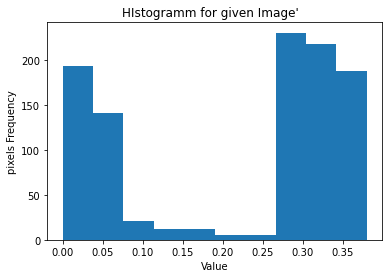

In [25]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('FALSE_NEGATIVES00007848_004.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]
# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

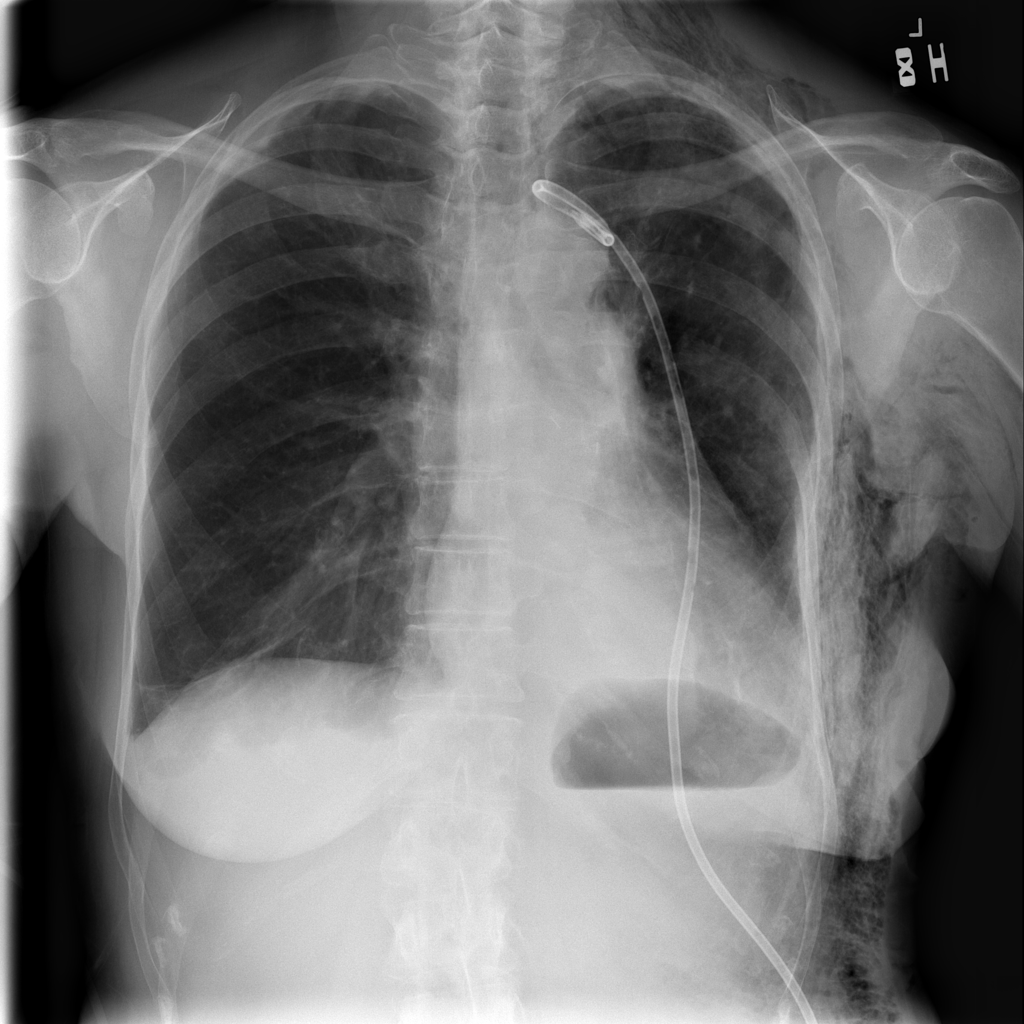

This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.


In [26]:
display(Image(filename='FALSE_NEGATIVES00007865_003.png'))

print("This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.")

(array([177.,  72., 107.,  97.,  34.,  30.,  35.,  38.,  35., 399.]),
 array([0.6745098 , 0.70705885, 0.7396079 , 0.7721569 , 0.8047059 ,
        0.8372549 , 0.8698039 , 0.9023529 , 0.93490195, 0.967451  ,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

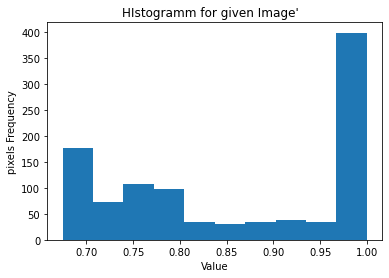

In [27]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('FALSE_NEGATIVES00007865_003.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]
# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

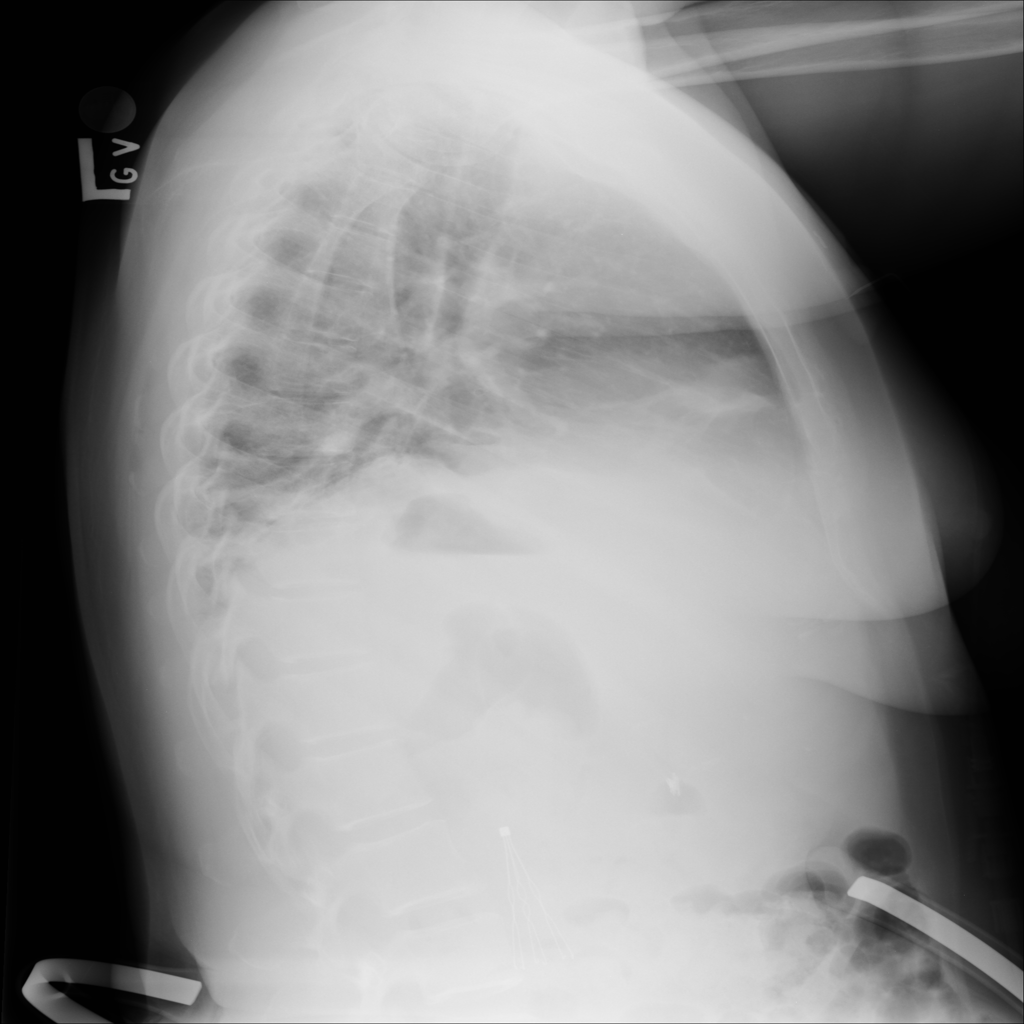

This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.


In [28]:
display(Image(filename='FALSE_NEGATIVES00007922_002.png'))

print("This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.")

(array([  12.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1012.]),
 array([0.        , 0.00039216, 0.00078431, 0.00117647, 0.00156863,
        0.00196078, 0.00235294, 0.0027451 , 0.00313726, 0.00352941,
        0.00392157], dtype=float32),
 <a list of 10 Patch objects>)

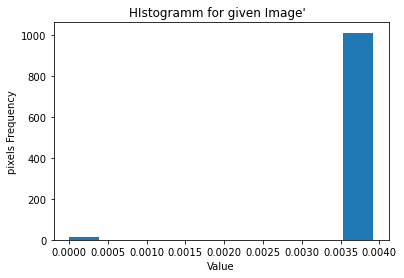

In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('FALSE_NEGATIVES00007922_002.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]
# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)